In [1]:
%pip install pandas numpy nltk scikit-learn

Note: you may need to restart the kernel to use updated packages.


#import modules

In [2]:
import pandas as pd
import numpy as np
import nltk

#read dataset

In [3]:
df=pd.read_csv("/kaggle/input/sms-spam-collection-dataset/spam.csv", encoding="latin-1")
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df1=df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=False) 
#dropping the columns with no use but for a new df. if inplace is True, it will drop the columns from the original df


In [6]:
df1.rename(columns={'v1':'class','v2':'message'},inplace=True)
df1.sample(5)

,class,message
5360,ham,"Hey, iouri gave me your number, I'm wylie, rya..."
1442,ham,"Its ok., i just askd did u knw tht no?"
3541,ham,ÌÏ come lt 25 n pass to me lar
3368,ham,Sorry i've not gone to that place. I.ll do so ...
147,ham,Ummma.will call after check in.our life will b...


In [7]:
df1.groupby('class').describe()

message                                                               
        count unique                                                top freq
class                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [8]:
df2=df1.drop_duplicates(keep='first')
df2.groupby('class').describe()

message                                                               
        count unique                                                top freq
class                                                                       
ham      4516   4516  Go until jurong point, crazy.. Available only ...    1
spam      653    653  Free entry in 2 a wkly comp to win FA Cup fina...    1

#data visualization

In [9]:
df2['length']=df2['message'].apply(len) #adding a new column to the df with the length of the message
df2.head()

/tmp/ipykernel_18/1290390370.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['length']=df2['message'].apply(len) #adding a new column to the df with the length of the message


,class,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

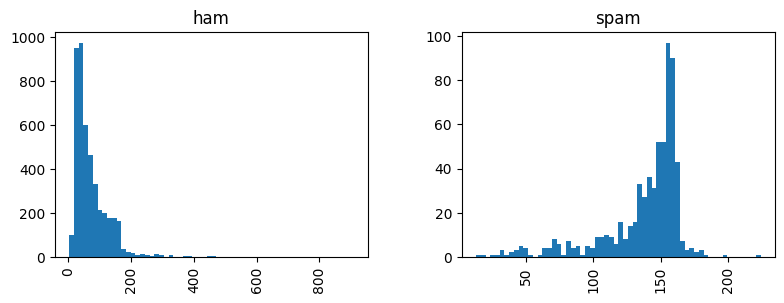

In [10]:
df2.hist(column='length',by='class',bins=60,figsize=(9,3)) 
#plotting the length of the messages by class bins is the number of bars

#preprocessing

In [11]:
from nltk.stem.porter import PorterStemmer as ps  #importing the stemmer which is used to reduce the words to their root form

nltk.download('stopwords') #stopwords are the words which are not useful in the text analysis like 'the', 'is', 'are' etc
from nltk.corpus import stopwords

nltk.download('punkt')  #punkt is used to tokenize the words in a sentence


[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>
[nltk_data] Error loading punkt: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>


False

In [12]:
df2.head()

,class,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


preprocessing tasks

-lowercase
-tokenization
-removing special characters
-removing stop words
-stemming

In [13]:
import string

def clean_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text) #tokenizing the words

    #removing the stopwords and punctuations
    y=[]
    for i in text:
        if i.isalnum(): #removing the punctuations
            y.append(i)
    
    text=y[:] #copying the list to text
    y.clear() #clearing the list

    for i in text:
        #check if a stopword or not and punctuation or not. if not both append to list
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text=y[:] #copying the list to text
    y.clear()

    for i in text:
        y.append(ps().stem(i)) #stemming (reducing the words to their root form) then appending to list

    return " ".join(y) #joining the list to form a sentence
    

In [14]:
df2['sms_cleaned'] =df2['message'].apply(clean_text) #applying the function to the message column


/tmp/ipykernel_18/3559807073.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['sms_cleaned'] =df2['message'].apply(clean_text) #applying the function to the message column


In [15]:
df2.head(5)

,class,message,length,sms_cleaned
0,ham,"Go until jurong point, crazy.. Available only ...",111,go jurong point avail bugi n great world la e ...
1,ham,Ok lar... Joking wif u oni...,29,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,49,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,nah think goe usf live around though


#feature extraction

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
tf_vec = TfidfVectorizer(max_features=3000) #taking the top 3000 features
X=tf_vec.fit_transform(df2['sms_cleaned']).toarray() #converting the text to array


In [18]:
X.shape 
#columns and rows representing the number of messages and the number of words respectively

(5169, 3000)

In [19]:
Y=df2['class'].values #taking the class column as the target variable

#Learning

In [20]:

from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test= train_test_split(X,Y,test_size=0.2,random_state=2)

In [21]:
from sklearn.naive_bayes import MultinomialNB #importing the model

model=MultinomialNB()
model.fit(X_train,y_train) #learn the relationship between x,y

MultinomialNB()

In [22]:
from sklearn.metrics import accuracy_score

y_pred=model.predict(X_test) #predict the target variable for the test data
print(accuracy_score(y_test,y_pred))


0.9729206963249516
